

# Performance checks


### Basic libraries and csv file

In [21]:
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = 'white')

In [3]:
# get data file names
path =r'/content/drive/MyDrive/Feature Collections/Complete Datasets'
filenames = glob.glob(path + "/*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all data into one DataFrame
data = pd.concat(dfs, ignore_index=True)
#data = data.sort_values(by = 'Date')

data = data[data['snowmelt_calc']!=0]
data

,Unnamed: 0,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
500,0,4580,0.159717,280.374431,8.185938e+06,0.006464,0.006546,0.008686
501,4,4612,0.624932,274.151286,1.096977e+07,0.004495,0.004628,0.138544
502,6,6081,0.715808,273.054444,1.214587e+07,0.001376,0.001568,0.028048
503,7,5907,0.403901,278.178142,1.045978e+07,0.004415,0.004728,0.017942
504,9,4864,0.814329,274.107097,6.208919e+06,0.012982,0.013269,0.018688
...,...,...,...,...,...,...,...,...
9189,7574,1582,0.227713,280.016113,6.844714e+06,0.033226,0.034696,0.067538
9190,7578,5820,0.852102,267.419759,1.144651e+07,0.005592,0.005664,0.000691
9191,7585,4389,0.724032,272.730062,9.400027e+06,0.017384,0.018264,0.088259
9192,7589,5240,0.858149,268.383138,1.237990e+07,0.013683,0.014308,0.006160


### Import all checkpoint files

In [4]:
f1 = pd.read_csv('/content/drive/MyDrive/Snowmelt estimation/check2.csv')
f2 = pd.read_csv('/content/drive/MyDrive/Snowmelt estimation/check3.csv')
f3 = pd.read_csv('/content/drive/MyDrive/Snowmelt estimation/check4.csv')

df = pd.concat([f1,f2,f3])
df

,Unnamed: 0,Layer nodes combination,RMSE,Val_RMSE
0,0,[8],0.063681,0.059319
1,1,[16],0.046725,0.045066
2,2,[32],0.048834,0.046152
3,3,[64],0.047273,0.044668
4,4,[128],0.046499,0.043396
...,...,...,...,...
635,635,"[128, 64, 24, 15, 10]",0.053012,0.050426
636,636,"[128, 64, 24, 20, 5]",0.049311,0.046791
637,637,"[128, 64, 24, 20, 10]",0.047892,0.045132
638,638,"[128, 64, 24, 25, 5]",0.053992,0.051432


In [5]:
df['RMSE']=df['RMSE']/(data['snowmelt_calc'].max()- data['snowmelt_calc'].min())
df['Val_RMSE']=df['Val_RMSE']/(data['snowmelt_calc'].max()- data['snowmelt_calc'].min())
df

,Unnamed: 0,Layer nodes combination,RMSE,Val_RMSE
0,0,[8],0.172365,0.160558
1,1,[16],0.126470,0.121979
2,2,[32],0.132178,0.124918
3,3,[64],0.127954,0.120902
4,4,[128],0.125859,0.117458
...,...,...,...,...
635,635,"[128, 64, 24, 15, 10]",0.143486,0.136486
636,636,"[128, 64, 24, 20, 5]",0.133469,0.126648
637,637,"[128, 64, 24, 20, 10]",0.129628,0.122159
638,638,"[128, 64, 24, 25, 5]",0.146139,0.139211


In [6]:
df=df.sort_values(by = 'Val_RMSE')
df

,Unnamed: 0,Layer nodes combination,RMSE,Val_RMSE
82,82,"[64, 48, 12]",0.123351,0.115309
589,589,"[128, 48, 12, 20, 10]",0.124310,0.116565
406,406,"[64, 16, 18, 25, 5]",0.124979,0.117032
97,97,"[128, 48, 6]",0.124491,0.117217
4,4,[128],0.125859,0.117458
...,...,...,...,...
47,47,"[16, 32, 18]",0.162310,0.156675
14,14,"[32, 32]",0.158778,0.158566
0,0,[8],0.172365,0.160558
109,109,"[16, 48, 24, 15]",0.171846,0.162846


# Final ANN model

We need to replicate the model which showed the best val_rmse from our test run. In order to do so we need to do the preprocessing steps and splitting as well.

In [7]:
dt = data
dt = dt[dt['snowmelt_calc']!=0]
dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] = (dt[['skin_temperature','elevation','surface_solar_radiation_downwards']] - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())/(dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].max() - dt[['skin_temperature','elevation','surface_solar_radiation_downwards']].min())
dt.head()

,Unnamed: 0,elevation,forecast_albedo,skin_temperature,surface_solar_radiation_downwards,total_precipitation,snow_acc,snowmelt_calc
500,0,0.661810,0.159717,0.924158,0.251529,0.006464,0.006546,0.008686
501,4,0.668874,0.624932,0.768436,0.393122,0.004495,0.004628,0.138544
502,6,0.993157,0.715808,0.740990,0.452942,0.001376,0.001568,0.028048
503,7,0.954746,0.403901,0.869200,0.367183,0.004415,0.004728,0.017942
504,9,0.724503,0.814329,0.767331,0.150972,0.012982,0.013269,0.018688


In [8]:
X = dt[['skin_temperature','forecast_albedo','elevation','surface_solar_radiation_downwards','total_precipitation','snow_acc']]
y = dt['snowmelt_calc']

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3,
                                                    random_state=122)
print("Labels for training and testing data")
print(train_y)
print(test_y)

Labels for training and testing data
6607    0.001358
6987    0.014448
917     0.111013
4942    0.033155
6248    0.064126
          ...   
8403    0.065991
6972    0.016681
7392    0.058534
5522    0.029796
3442    0.005863
Name: snowmelt_calc, Length: 4685, dtype: float64
2320    0.019607
5428    0.059300
1644    0.004191
1468    0.025241
8209    0.221176
          ...   
4872    0.030538
6231    0.034207
7277    0.004560
8968    0.011854
3160    0.000623
Name: snowmelt_calc, Length: 2009, dtype: float64


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Model building and testing

## Model Architecture

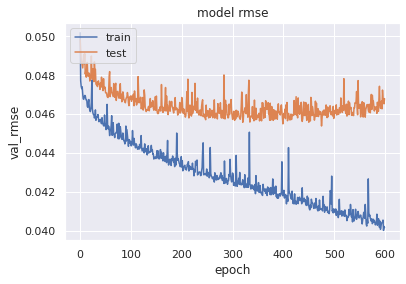

0.0401662178337574 0.04679674655199051


In [10]:
model = keras.Sequential([
  layers.Dense(64,activation=None, input_shape=[6]),
  layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
  layers.Dense(48, activation=None),
  layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
  layers.Dense(12, activation=None),
  layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
  layers.Dense(1,activation = None),
  layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None)
])

checkpoint_filepath = '/content/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_root_mean_squared_error',
    mode='min',
    save_best_only=True)

# Compile the model with the specified loss function.
reduce_lr = ReduceLROnPlateau(monitor='loss', mode ='min',factor=0.2,
                              patience=3, min_lr=0.000000001)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['RootMeanSquaredError'])
history = model.fit(train_X, train_y,callbacks=[model_checkpoint_callback],validation_split=0.33, epochs=600, verbose=0)
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model rmse')
plt.ylabel('val_rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
print(history.history['root_mean_squared_error'][-1],history.history['val_root_mean_squared_error'][-1])

## Model loading and testing

In [32]:
# model.load_weights(checkpoint_filepath)

In [39]:
# model.save('/content/drive/MyDrive/Models/ann')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/ann/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Models/ann/assets


In [40]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Models/ann")

In [41]:
# Model prediction
temp= model.predict(test_X)
temp[temp<0]=0

In [42]:
#Results Stats
import math
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score#R square

mse = mean_squared_error(test_y,temp)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_y,temp)
r2 = r2_score(test_y,temp)
norm_rmse = rmse/(float(dt['snowmelt_calc'].max()-dt['snowmelt_calc'].min()))

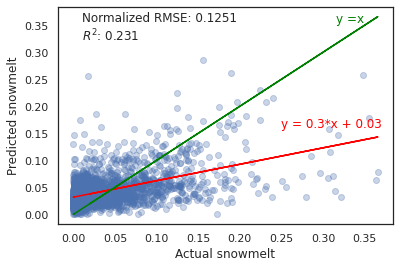

In [43]:
#Visualization of results
plt.scatter(test_y,temp,cmap = 'virdis',alpha = 0.3)
m, b = np.polyfit(test_y, temp, 1)
plt.xlabel('Actual snowmelt')
plt.ylabel('Predicted snowmelt')
plt.plot(test_y, m*test_y + b,color = 'red')
plt.plot(test_y, 1*test_y + 0,color = 'green')
#Results Stats
import math
from sklearn.metrics import mean_squared_error # MSE
from sklearn.metrics import mean_absolute_error # MAE
from sklearn.metrics import r2_score#R square

slope = float(m)
intercept = float(b)
slope,intercept

mse = mean_squared_error(test_y,temp)
rmse = math.sqrt(mse)
mae = mean_absolute_error(test_y,temp)
r2 = r2_score(test_y,temp)
norm_rmse = rmse/(float(dt['snowmelt_calc'].max()-dt['snowmelt_calc'].min()))
plt.text(0.01,0.32, 'Normalized RMSE: '+str(np.round(norm_rmse,4))+'\n$R^2$: '+str(np.round(r2,3)))
plt.text(0.25,0.16, 'y = '+str(round(slope,2))+'*x + '+str(round(intercept,2)),color = 'red',fontsize = 12)
plt.text(0.315,0.355, 'y =x',fontsize = 12,color = 'green')
plt.savefig('ANN_graph.tif',dpi = 300)
plt.show()

In [44]:
print('MSE:',mse,'\nRMSE:',rmse,'\nMAE:',mae,'\nR2:',r2,'\nNormalized RMSE:',norm_rmse,'\nSlope:',slope,'\nIntercept:',intercept)

MSE: 0.0021347824523439713 
RMSE: 0.046203706045554085 
MAE: 0.03262948568738699 
R2: 0.23074514685254677 
Normalized RMSE: 0.12505893945777694 
Slope: 0.3041527592237413 
Intercept: 0.03192794705624392
